In [ ]:
Notebook to perform sanity checks.  
Currently checks if the encoding and decoding is done properly: this is the case.  
    
    
    

In [1]:
# Imports
import random
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import matplotlib.animation as animation
from IPython.display import HTML

import model

import torch

import keijzer_exogan as ke

# initialize random seeds
manualSeed = 999
random.seed(manualSeed)
torch.manual_seed(manualSeed)

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab
# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks')

# Loading dict

In [2]:
%%time
dir_ = '/datb/16011015/ExoGAN_data//'

X = np.load(dir_+'selection/last_chunks_25_percent.npy')

X = X.flatten()
np.random.shuffle(X) # note that X = np.rand.... isn't required
X = X[:5000]
print('Len X: ', len(X))

np.random.seed(23) # Set seed for the np.random functions

# Shuffle X along the first axis to make the order of simulations random


wavelengths = ke.load_wavelengths()

Len X:  5000
CPU times: user 41.6 s, sys: 9 s, total: 50.6 s
Wall time: 50.7 s


# Check if original params = decoded params

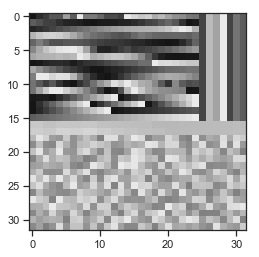

In [3]:
X_selected = X[1]

aspa = ke.ASPA_v4(X_selected, wavelengths)

plt.imshow(aspa, cmap='gray', vmin=-1.2, vmax=1.2)

## Ground truth params

In [4]:
params = X_selected['param']

# convert mixratio's from linear scale to log10, that's how they're encoded in the aspa (as dexes)
for param in params.keys():
    #print('Param: ', param)
    if 'mixratio' in param: 
        params[param] = np.log10(params[param]) # transform mixratio's to dex because they are generated on logarithmic scale
        
params

{'ch4_mixratio': -3.333333333333333,
 'co2_mixratio': -4.888888888888889,
 'co_mixratio': -5.666666666666666,
 'h2o_mixratio': -6.444444444444445,
 'planet_mass': 2.0245333333333333e+27,
 'planet_radius': 104866500.0,
 'temperature_profile': 1777.7777777777778}

## Decoded params from ASPA

In [7]:
ke.decode_params_from_aspa(aspa)

{'ch4_mixratio': -3.333333333333333,
 'co2_mixratio': -4.888888888888889,
 'co_mixratio': -5.666666666666666,
 'h2o_mixratio': -6.444444444444445,
 'planet_mass': 2.0245333333333333e+27,
 'planet_radius': 104866500.0,
 'temp_profile': 1777.7777777777778}

### They are the same.

# Check if original spectrum = decoded spectrum

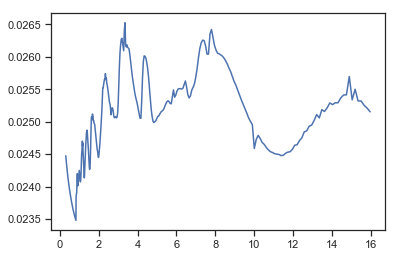

In [19]:
spectrum = X_selected['data']['spectrum']

df = ke.combine_spectrum_with_wavelengths(spectrum, wavelengths)

df = df[df.x <= 16]

plt.plot(df.x, df.y)

/home/16011015/notebooks/SRON-DCGAN/notebooks/keijzer_exogan.py:370: RuntimeWarning: Mean of empty slice.
  mins_ = [aspa[16:17, i*2:i*2+2].mean() for i in range(n_bins)]
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/16011015/notebooks/SRON-DCGAN/notebooks/keijzer_exogan.py:371: RuntimeWarning: Mean of empty slice.
  maxs_ = [aspa[17:18, i*2:i*2+2].mean() for i in range(n_bins)]
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


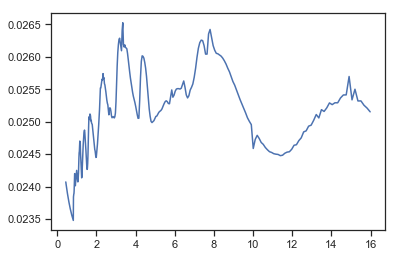

In [21]:
x,y = ke.decode_spectrum_from_aspa(aspa)
_ = plt.plot(x,y)

### They are the same!